In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset1.csv')

# Inspect shape, data types, and nulls
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape: (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract          

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors (will set non-numeric as NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values again
print("Missing after conversion:\n", df['TotalCharges'].isnull().sum())

# Option 1: Drop missing rows
df = df.dropna(subset=['TotalCharges'])

# Option 2 (alternative): Fill with median or mean
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Missing after conversion:
 11


In [ ]:
def tenure_group(tenure):
    if tenure <= 12:
        return 'Low'
    elif 12 < tenure <= 48:
        return 'Medium'
    else:
        return 'High'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


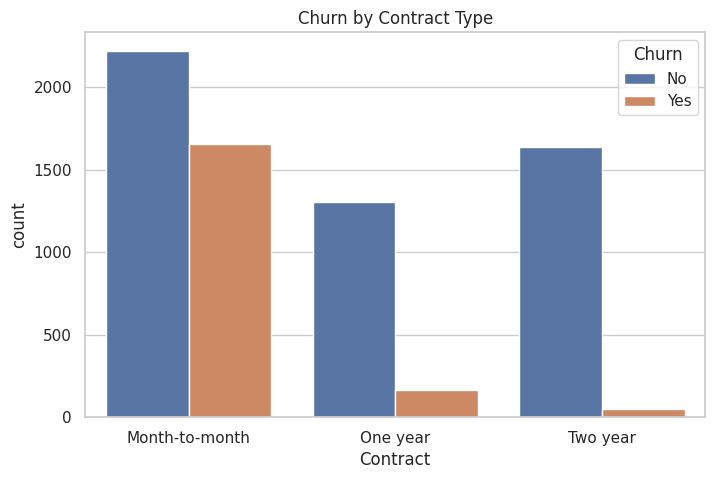

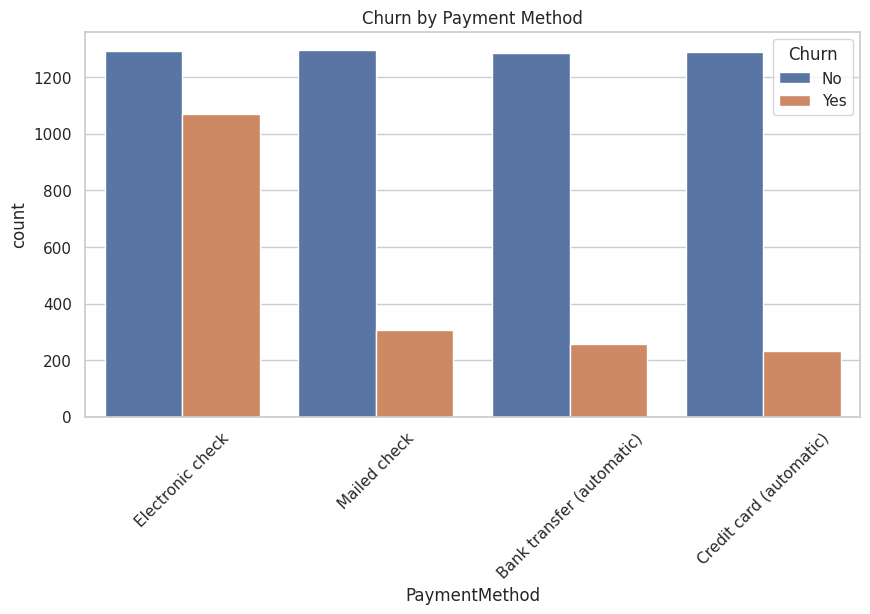

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid')

# Plot 1: Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

# Plot 2: Churn by Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()
